# Objective

Creating an airline delay dashboard

## Dashboard components:

*   Monthly average carrier delay by reporting airline for the given year.
*   Monthly average weather delay by reporting airline for the given year.
*   Monthly average natioanl air system delay by reporting airline for the given year.
*   Monthly average security delay by reporting airline for the given year.
*   Monthly average late aircraft delay by reporting airline for the given year.

##### *NOTE:* Year range should be between 2010 and 2020

## TODO:

1.   Design layout for the application.
2.   Create a callback function. Add callback decorator and define inputs and outputs.
3.   Call `compute_info` with appropriate parameters.
4.   Create 5 line graphs.
5.   Run the application.

## Helper to fill TODOs

### TODO1

Deals with providing title to the dashboard and styling it.

*   Title as `Flight Delay Time Statistics`, align text as `center`, color as `#503D36`, and font size as `30`.
*   Style sample: `style={'textAlign': 'right', 'color': '#000000', 'font-size': 0})`

### TODO2

Deals with creating dash input core component and styling it

*   Set id for the component as `input-year`, default value as `2010`, and type as `number`.
*   Style: provide height of the input box to be `35px` and font size as `30`.
*   Style sample: `style={'height':'3px', 'font-size': 00}`

### TODO3

Deals with adding graph component and providing ids.

*   Add dcc.Graph component.
*   Provide ids in the following order `carrier-plot`, `weather-plot`, `nas-plot`, `security-plot`, and `late-plot`.

### TODO4

Deals with structing callback output components.

*   List containing component id and component property.
*   Component id will be similar to `TODO3` ids and property will be `figure`.

### TODO5

Deals with extracting computed data for creating graphs.

*   Function will be returning 5 computed dataframes. set returned dataframes names to be `avg_car, avg_weather, avg_NAS, avg_sec, avg_late`.

### TODO6

Deals with creating line plots using returned dataframes from the above step using `plotly.express`. Link for reference is [here](https://plotly.com/python/line-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### 1. Monthly average carrier delay by reporting airline for the given year

*   Set figure name as `carrier_fig`, data as `avg_car`, x as `Month`, y as `CarrierDelay`, color as `Reporting_Airline` and `title` as `Average carrrier delay time (minutes) by airline`.
*   Sample: `carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrrier delay time (minutes) by airline')`

#### 2. Monthly average weather delay by reporting airline for the given year

Set figure name as `weather_fig`, data as `avg_weather`, x as `Month`, y as `WeatherDelay`, color as `Reporting_Airline` and `title` as `Average weather delay time (minutes) by airline`.

#### 3. Monthly average natioanl air system delay by reporting airline for the given year

Set figure name as `nas_fig`, data as `avg_NAS`, x as `Month`, y as `NASDelay`, color as `Reporting_Airline` and `title` as `Average NAS delay time (minutes) by airline`.

#### 4. Monthly average security delay by reporting airline for the given year

Set figure name as `sec_fig`, data as `avg_sec`, x as `Month`, y as `SecurityDelay`, color as `Reporting_Airline` and `title` as `Average security delay time (minutes) by airline')`.

#### 5. Monthly average late aircraft delay by reporting airline for the given year

Set figure name as `late_fig`, data as `avg_late`, x as `Month`, y as `LateAircraftDelay`, color as `Reporting_Airline` and `title` as `Average late aircraft delay time (minutes) by airline`.


In [4]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px

# Create a dash application
app = JupyterDash(__name__)
JupyterDash.infer_jupyter_proxy_config()


# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

""" Compute_info function description

This function takes in airline data and selected year as an input and performs computation for creating charts and plots.

Arguments:
    airline_data: Input airline data.
    entered_year: Input year for which computation needs to be performed.
    
Returns:
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.

"""
def compute_info(airline_data, entered_year):
    # Select data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late
    
    
# Build dash app layout
app.layout = html.Div(children=[ html.H1('Flight Delay Time Statistics', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 30}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'35px', 'font-size': 30}),], 
                                style={'font-size': 30}),
                                html.Br(),
                                html.Br(), 
                                html.Div([
                                        html.Div(dcc.Graph(id='carrier-plot')),
                                        html.Div(dcc.Graph(id='weather-plot'))
                                ], style={'display': 'flex'}),
    
                                html.Div([
                                        html.Div(dcc.Graph(id='nas-plot')),
                                        html.Div(dcc.Graph(id='security-plot'))
                                ], style={'display': 'flex'}),
                                
                                html.Div(dcc.Graph(id='late-plot'), style={'width':'65%'})
                                
                              
                                ])

"""Callback Function

Function that returns fugures using the provided input year.

Arguments:

    entered_year: Input year provided by the user.
    
Returns:

    List of figures computed using the provided helper function `compute_info`.
"""
# Callback decorator
@app.callback( [
               Output(component_id='carrier-plot', component_property='figure'),
               Output(component_id='weather-plot', component_property='figure'),
               Output(component_id='nas-plot', component_property='figure'),
               Output(component_id='security-plot', component_property='figure'),
               Output(component_id='late-plot', component_property='figure')
               ],
               Input(component_id='input-year', component_property='value'))
# Computation to callback function and return graph
def get_graph(entered_year):
    
    # Compute required information for creating graph from the data
    avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_info(airline_data, entered_year)
            
    # Create graph
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrrier delay time (minutes) by airline')
    weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
    nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
    sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
    late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')
            
    return[carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]



# Run the app
if __name__ == '__main__':
    app.run_server(mode="inline", host="localhost", port=8045, debug=True)

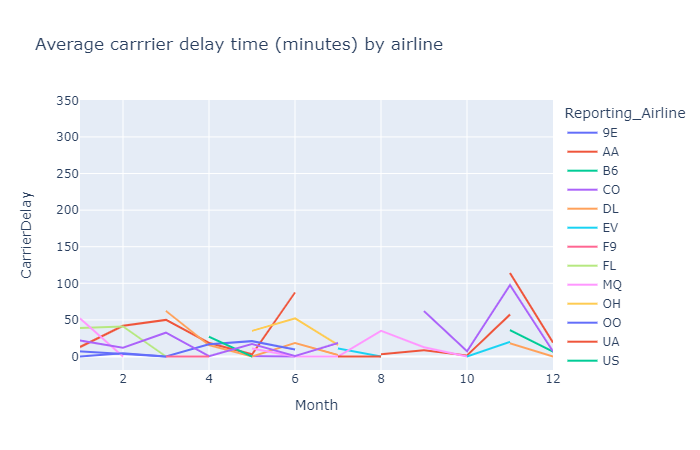

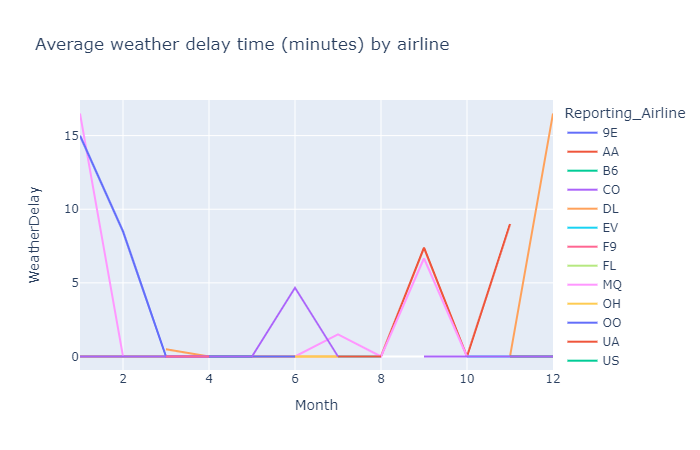

_**Note**: Since this is a very simple application, it was only run locally and not uploaded to a server, so it is not available to be seen in GitHub, but a png image of the dashboard was uploaded above._

__This is the end of the notebook.__ In this notebook some of the knowledge required for a data scientist and some of the skills used by data scientists on a daily basis were shown and applied. The learning material was provided by IBM, and the development of the code and notebook, as well as some notes and editions were carried out by me, [Saulo Villaseñor](https://www.linkedin.com/in/saulo-villase%C3%B1or-60669610a), so that this notebook is available as a reference for anyone who wishes to learn new skills.